In [2]:
import numpy as np
import jax.numpy as jnp
import jax

import scoobpsf.jax_dm as jdm
from scoobpsf.imshows import *

from importlib import reload

Nact = 34
Nacts = 952
act_spacing = 300*u.um

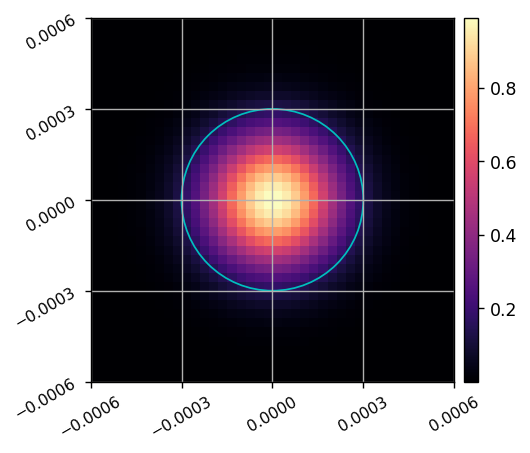

In [3]:
# reload(scoobpsf.jax_dm)
reload(jdm)
inf_fun, inf_sampling, inf_pixelscale = jdm.make_gaussian_inf_fun(sampling=10, Nacts_per_inf=4, plot=True)

In [69]:
inf_fun.shape, inf_pixelscale

((30, 30), <Quantity 3.e-05 m / pix>)

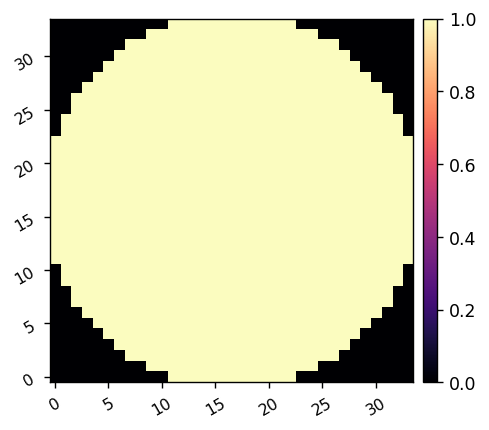

952


In [11]:
reload(jdm)
dm_mask = jdm.make_dm_mask(plot=True)
print(dm_mask.sum())

In [12]:
reload(jdm)
inf_matrix = jdm.make_inf_matrix(inf_fun, inf_sampling, dm_mask)

2023-10-14 17:55:42.061397: E external/org_tensorflow/tensorflow/compiler/xla/python/pjit.cc:461] fastpath_data is none


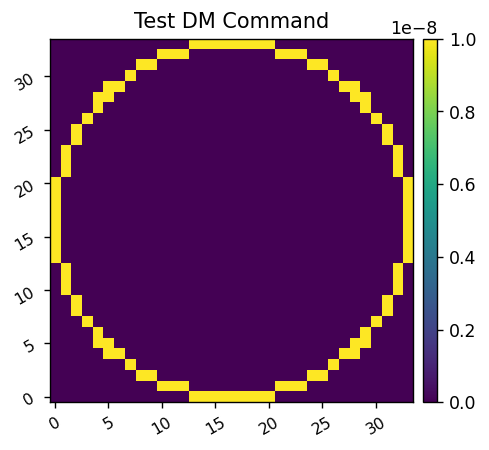

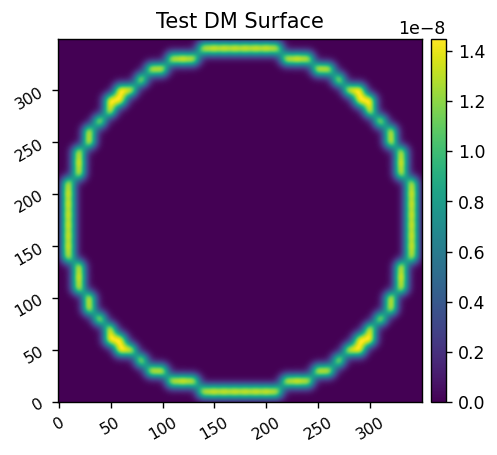

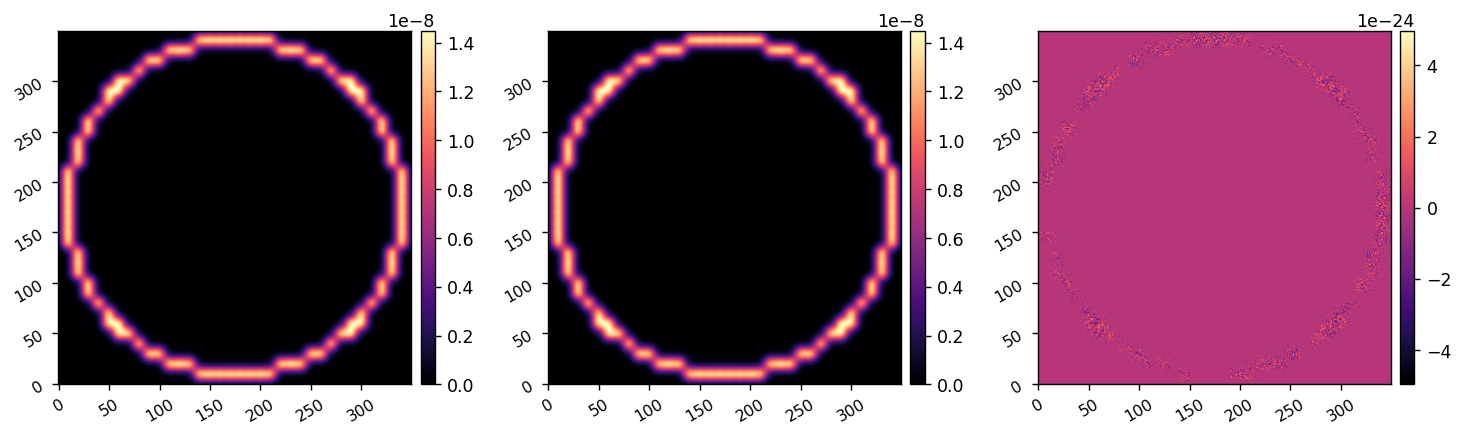

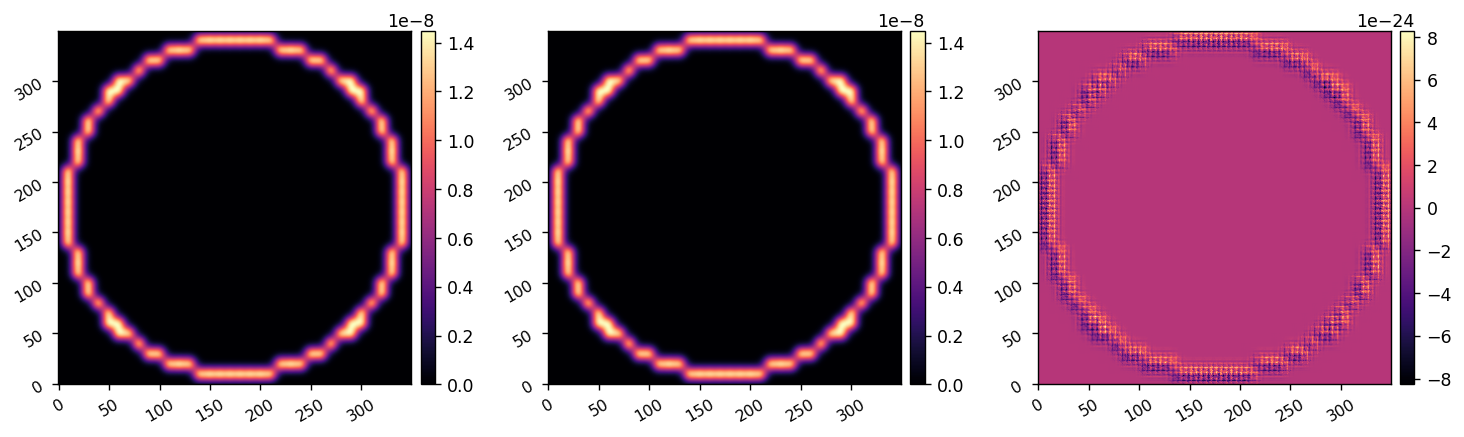

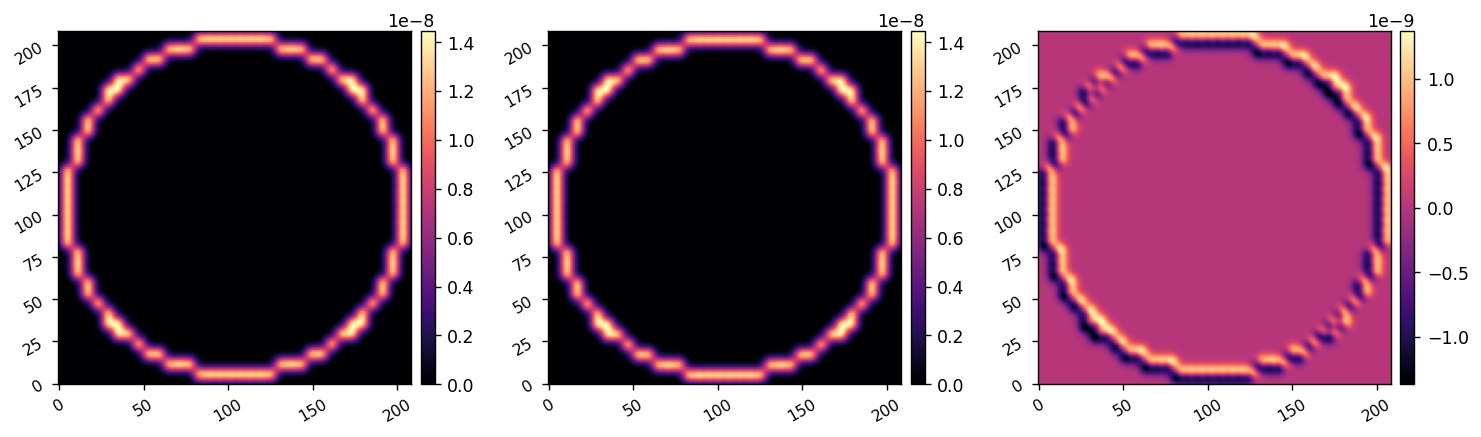

In [13]:
reload(jdm)
Nact = 34
xx = (np.linspace(0, Nact-1, Nact) - Nact/2 + 1/2)
x,y = np.meshgrid(xx,xx)
r = np.sqrt(x**2 + y**2)
ring_command = np.asarray((r<Nact//2)*(r>(Nact//2-1)), dtype=np.float64)
ring_command *= 1e-8
command = jnp.array(ring_command)
imshow1(ensure_np_array(command), 'Test DM Command', cmap='viridis')

test_surf = jdm.get_surf(jdm.map_command_to_actuators(command, dm_mask), inf_matrix)
imshow1(ensure_np_array(test_surf), 'Test DM Surface', cmap='viridis')

imshow3(test_surf, test_surf.T, test_surf-test_surf.T )

imshow3(test_surf, jnp.flipud(jnp.fliplr(test_surf)), test_surf-jnp.flipud(jnp.fliplr(test_surf)) )

act_spacing = 300e-6*u.m
test_surf = np.asarray(jdm.get_surf(jdm.map_command_to_actuators(command, dm_mask), inf_matrix, 
                                    pixelscale=50*u.um/u.pix, inf_pixelscale=act_spacing/(inf_sampling*u.pix)))
imshow3(test_surf, jnp.flipud(jnp.fliplr(test_surf)), test_surf-jnp.flipud(jnp.fliplr(test_surf)) )


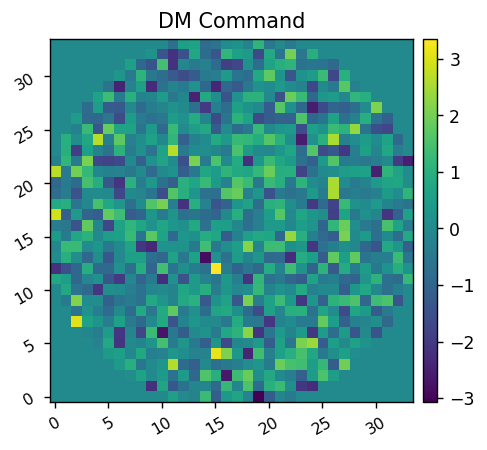

In [14]:
actuators = jnp.array(np.random.randn(Nacts))
imshow1(jdm.map_actuators_to_command(actuators, dm_mask), 'DM Command', cmap='viridis')

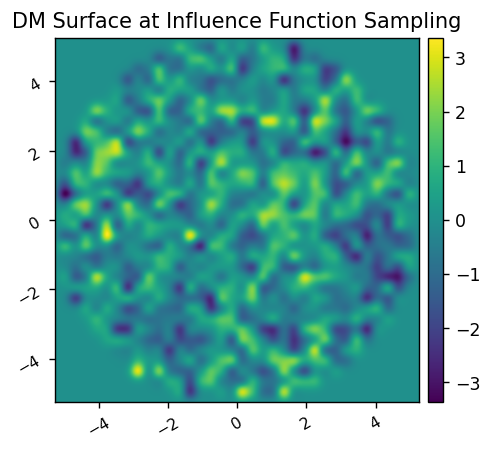

In [15]:
surf = jdm.get_surf(actuators, inf_matrix)
imshow1(surf, 'DM Surface at Influence Function Sampling',
        pxscl=inf_pixelscale.to(u.mm/u.pix), cmap='viridis')

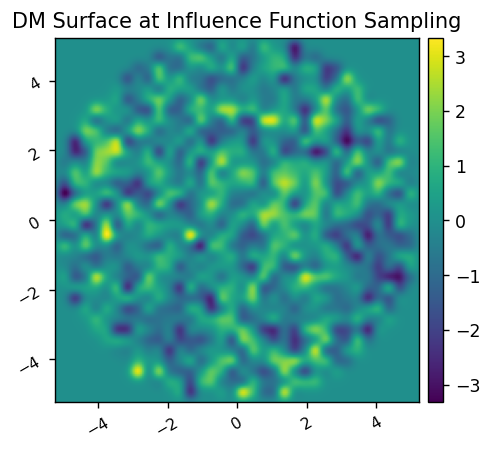

In [17]:
surf_pxscl = 50*u.um/u.pix
surf = jdm.get_surf(actuators, inf_matrix, inf_pixelscale=inf_pixelscale, pixelscale=surf_pxscl)
imshow1(surf, 'DM Surface at Influence Function Sampling',
        pxscl=surf_pxscl.to(u.mm/u.pix), cmap='viridis')

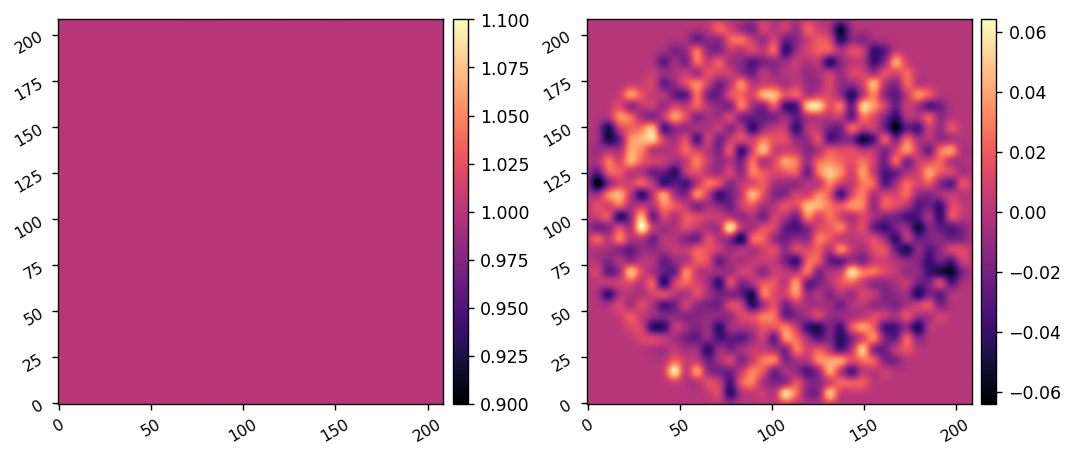

In [19]:
reload(jdm)
phasor = jdm.get_phasor(actuators*1e-9, inf_matrix, inf_pixelscale=inf_pixelscale, pixelscale=surf_pxscl)

imshow2(jnp.abs(phasor), jnp.angle(phasor))